#### Capstone Project: 

Student name: Milena Afeworki   
Student pace: full time   
Scheduled project review date/time: 07/09/2021 @ 10:15 PT   
Instructor name: Abhineet Kulkarni   
Blog post URL:

# Bridges Condition Classificaiton Model



January 2019 marked the release of the Long-Term Bridge Performance (LTBP) Program’s InfoBridge™ web portal, a newly developed website for dissemination and visualization of bridge data, information, and products developed by the LTBP Program. The portal’s main purpose is to leverage the analytical capability of the highway bridge research community, and fulfill the Federal Highway Administration’s (FHWA’s) responsibility to provide transparency and ready access to data collected through Federal research programs.

## The Business Problem

Bridge management practices of departments of transportation is looking to assist bridge managers in making consistent and cost-effective decisions related to maintenance and rehabilitation of bridges. The decision making, either at the network level or at the project level, is based on current and future bridge conditions. Therefore, it is essential for a bridge management system to be capable of accurately predicting future bridge conditions to help make an informed decision on when and where to allocate maintenance budgets. 

## Data Understanding

The data pattern underlying the historical bridge inspection records contains useful information in
describing the deterioration trends of highway bridge decks, sub-structure and super-structure. Therefore, developing an appropriate
algorithm that can identify data patterns buried in history can solve the condition-forecast problem. The data-mining algorithm emphasizes the changing trends of bridge condition ratings along withother factors that may influence the structure-deterioration process.

The analysis uses NBI and climatic data from InfoBridge. The climatic data refer to the annual
numbers (unit in days) of freeze-thaw cycles and snowfalls. The National Aeronautics and Space
Administration (NASA) Modern-Era Retrospective Analysis for Research and Applications,
Version 2 (MERRA-2) program provides the original source of climate data  which is currently available from January 1, 1980 to December 31, 2020.


```
NBI scale	Condition	    Description

        9	Excellent	    New condition, no noteworthy deficiencies.
        8	Very good	    No repair needed.
        7	Good	         Some minor problems, minor maintenance needed.
        6	Satisfactory	 Some minor deterioration, major maintenance needed.
        5	Fair	         Minor section loss, cracking, spalling, or scouring.
        4	Poor	         Advanced section loss, deterioration, spalling or scouring; major rehabilitation needed. 
        3	Serious	      Section loss, deterioration, spalling or scouring seriously affected primary components.
        2	Critical	     Advanced deterioration of primary structural elements; bridge closed. 
        1	Imminent         Major deterioration or loss of section; bridge may be closed to traffic.
            failure
        0	Failed	       Out of service and beyond corrective action.

 ```


## Obtain data

In [1]:
#Importing all the necessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
sns.set_style()

In [2]:
# pd.options.display.max_columns = None

In [3]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)']

In [4]:
# load first dataset.
ddf = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/BridgesExport_August_25_2021_03_04_42.csv',
                names = columns, usecols=range(0,15),error_bad_lines=False, sep = ',', header = 0)
ddf.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,CAT10 - Bridge Condition,Bridge Age (yr),26 - Functional Class Of Inventory Route,28A - Lanes On the Structure,28B - Lanes Under the Structure,5C - Designated Level of Service Code,30 - Year of Average Daily Traffic,104 - Inventory Route NHS Code,110 - Designated National Truck Network Code,54B - Minimum Vertical Underclearance (ft),55B - Minimum Lateral Underclearance on Right (ft),56 - Minimum Lateral Underclearance on Left (ft)
0,'1 - Alabama',080103000001007,'U.S. Forest Service','Good',45,'9',1,0,'0',0.0,'0','0',0.0000000,0.0000000,0.0
1,'1 - Alabama',080106000001009,'U.S. Forest Service','Fair',40,'9',1,0,'0',0.0,'0','0',0.0000000,0.0000000,0.0
2,'1 - Alabama',020222,'State Highway Agency','Good',7,'7',2,0,'1',2013.0,'0','0',0.0000000,0.0000000,0.0
3,'1 - Alabama',021152,'State Highway Agency','Good',4,'11',1,2,'7',2017.0,'0','0',14.4000000,9.2000000,7.8
4,'1 - Alabama',021480,'State Highway Agency','Good',15,'2',2,0,'1',2012.0,'1','1',0.0000000,0.0000000,0.0


In [5]:
ddf.shape

(618456, 15)

In [6]:
ddf.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)'],
      dtype='object')

In [7]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days']

In [8]:
# Load second dataset.
new_df = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/BridgesExport_August_19_2021_07_08_24.csv',
                     names = columns, usecols=range(0,11), error_bad_lines=False, sep = ',', header = 0)
new_df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,Number of Snowfall Days
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,NaN
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,NaN
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14,6,8.0
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20,NaN,NaN
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35,14,0.0


In [9]:
new_df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days'],
      dtype='object')

In [10]:
new_df.shape

(618456, 11)

In [11]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit', '49 - Structure Length (ft)',
       '6A - Features Intersected', '7 - Facility Carried By Structure',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       'CAT29 - Deck Area (sq.ft)']

In [12]:
# load third dataset
df = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/Bridge_data.txt',
                 names = columns, usecols=range(0,15), error_bad_lines=False, sep = ',', header = 0)
df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,3 - County Name,27 - Year Built,29 - Average Daily Traffic,43A - Main Design Mat Type Value,43B - Main Construction Design Value,45 - Number of Spans in Main Unit,49 - Structure Length (ft),6A - Features Intersected,7 - Facility Carried By Structure,CAT10 - Bridge Condition,Bridge Age (yr),CAT29 - Deck Area (sq.ft)
0,'1 - Alabama',020260,'County Highway Agency','069 - Houston County',1960,1654,'Concrete','Culvert',2,24.6,'SAUNDERS BRANCH ','W. SAUNDERS RD. ','Good',61,540.9
1,'1 - Alabama',007641,'State Highway Agency','005 - Barbour County',1962,13980,'Steel Continuous','Stringer/Multi-beam or Girder',4,1131.9,'CHATTAHOOCHEE RIVER ','US 82 MP 239.816 ','Fair',59,74642.3
2,'1 - Alabama',009096,'County Highway Agency','005 - Barbour County',1967,260,'Concrete','Culvert',3,26.2,'BLACKS BRANCH ','LEROY RD ','Fair',54,731.9
3,'1 - Alabama',019608,'County Highway Agency','113 - Russell County',2005,50,'Wood or Timber','Stringer/Multi-beam or Girder',2,24,'SNAKE CREEK ','WILDMAN BOTTOM ','Fair',16,385
4,'1 - Alabama',002529,'State Highway Agency','005 - Barbour County',1941,4495,'Steel Continuous','Stringer/Multi-beam or Girder',12,266.1,'WHITE OAK CREEK ','US 431 MP 57.766 ','Fair',80,7769.3


In [13]:
df.shape

(618456, 15)

In [14]:
df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit', '49 - Structure Length (ft)',
       '6A - Features Intersected', '7 - Facility Carried By Structure',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       'CAT29 - Deck Area (sq.ft)'],
      dtype='object')

In [15]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '9 - Location', '16 - Latitude (decimal)',
       '17 - Longitude (decimal)', '21 - Maintenance Responsibility',
       '106 - Year Reconstructed', '34 - Skew Angle (degrees)',
       '48 - Length of Maximum Span (ft)',
       '51 - Bridge Roadway Width Curb to Curb (ft)',
       '52 - Deck Width - Out to Out (ft)', '59 - Superstructure Condition',
       '60 - Substructure Condition', '58 - Deck Condition']

In [16]:
# load fourth dataset
df1 = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/Bridges_location_data.txt',
                  names = columns, usecols=range(0,16), error_bad_lines=False,
                 sep = ',', header = 0)
df1.head()

C:\Users\milen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,1 - State Name,8 - Structure Number,22 - Owner Agency,3 - County Name,9 - Location,16 - Latitude (decimal),17 - Longitude (decimal),21 - Maintenance Responsibility,106 - Year Reconstructed,34 - Skew Angle (degrees),48 - Length of Maximum Span (ft),51 - Bridge Roadway Width Curb to Curb (ft),52 - Deck Width - Out to Out (ft),59 - Superstructure Condition,60 - Substructure Condition,58 - Deck Condition
0,'1 - Alabama',080103000001007,'U.S. Forest Service','039 - Covington County','CONECUH NATIONAL FOREST ',0,0,'64',0,20,0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'U.S. Forest Service','027 - Clay County','NATIONAL FOREST ',0,0,'64',0,45,0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'State Highway Agency','061 - Geneva County','1 mi. west of al 52 ',31.10981,-9.024917,'1',0,0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'State Highway Agency','073 - Jefferson County','_11TH AVE ',33.52243,-33.52243,'1',0,0,75.1,24.9,27.6,'9','9','9'
4,'1 - Alabama',021480,'State Highway Agency','069 - Houston County','GA. /ALA . LINE ',31.12305,-85.05527,'1',0,23,274.9,38.1,41.0,'7','7','7'


In [17]:
df1.shape

(618456, 16)

In [18]:
df1.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '9 - Location', '16 - Latitude (decimal)',
       '17 - Longitude (decimal)', '21 - Maintenance Responsibility',
       '106 - Year Reconstructed', '34 - Skew Angle (degrees)',
       '48 - Length of Maximum Span (ft)',
       '51 - Bridge Roadway Width Curb to Curb (ft)',
       '52 - Deck Width - Out to Out (ft)', '59 - Superstructure Condition',
       '60 - Substructure Condition', '58 - Deck Condition'],
      dtype='object')

## Merging tables

In [19]:
#Merge the first two datasets together
new_df = new_df.merge(ddf, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], 
                  right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], how='left')
new_df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,...,26 - Functional Class Of Inventory Route,28A - Lanes On the Structure,28B - Lanes Under the Structure,5C - Designated Level of Service Code,30 - Year of Average Daily Traffic,104 - Inventory Route NHS Code,110 - Designated National Truck Network Code,54B - Minimum Vertical Underclearance (ft),55B - Minimum Lateral Underclearance on Right (ft),56 - Minimum Lateral Underclearance on Left (ft)
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,'9',1,0,'0',0.0,'0','0',0.0000000,0.0000000,0.0
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,'9',1,0,'0',0.0,'0','0',0.0000000,0.0000000,0.0
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14,6,...,'7',2,0,'1',2013.0,'0','0',0.0000000,0.0000000,0.0
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20,NaN,...,'11',1,2,'7',2017.0,'0','0',14.4000000,9.2000000,7.8
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35,14,...,'2',2,0,'1',2012.0,'1','1',0.0000000,0.0000000,0.0


In [20]:
#Merge the second two datasets together
df = new_df.merge(df, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], 
                  right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], how='left')
df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,...,29 - Average Daily Traffic,43A - Main Design Mat Type Value,43B - Main Construction Design Value,45 - Number of Spans in Main Unit,49 - Structure Length (ft),6A - Features Intersected,7 - Facility Carried By Structure,CAT10 - Bridge Condition_y,Bridge Age (yr)_y,CAT29 - Deck Area (sq.ft)
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,50,'Concrete','Culvert',2,21,'PERSIMMON CREEK ','332 ','Good',45,316.9
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,50,'Steel','Culvert',2,24.9,'HORSE CREEK ','FDR 637 ','Fair',40,449.9
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14,6,...,1120,'Concrete','Culvert',3,24.9,'STREAM ','SR-54 MP 14.942 ','Good',7,899.9
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20,NaN,...,2017,'Prestressed Concrete','Stringer/Multi-beam or Girder',1,75.1,'_15TH STREET NORTH ','_11TH AVE. RAMP ','Good',4,2070.5
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35,14,...,4940,'Steel Continuous','Stringer/Multi-beam or Girder',3,955.1,'CHATTAHOOCHEE RIVER ','US84/ SR 38 ','Good',15,39167.1


In [ ]:
#####################################
#Merge the two merged datasets together
merged_dfx = df.merge(df1, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency',], how='left')
merged_dfx.head()

In [21]:
#Merge the two merged datasets together
merged_df = df.merge(df1, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency',], how='left')
merged_df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,...,17 - Longitude (decimal),21 - Maintenance Responsibility,106 - Year Reconstructed,34 - Skew Angle (degrees),48 - Length of Maximum Span (ft),51 - Bridge Roadway Width Curb to Curb (ft),52 - Deck Width - Out to Out (ft),59 - Superstructure Condition,60 - Substructure Condition,58 - Deck Condition
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,0,'64',0,20,0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,0,'64',0,45,0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14,6,...,-9.024917,'1',0,0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20,NaN,...,-33.52243,'1',0,0,75.1,24.9,27.6,'9','9','9'
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35,14,...,-85.05527,'1',0,23,274.9,38.1,41.0,'7','7','7'


In [22]:
merged_df.shape

(618456, 48)

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618456 entries, 0 to 618455
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   1 - State Name                                      618456 non-null  object 
 1   8 - Structure Number                                618456 non-null  object 
 2   22 - Owner Agency                                   618456 non-null  object 
 3   107 - Deck Structure Type Code                      618456 non-null  object 
 4   108A - Wearing Surface Type Code                    618456 non-null  object 
 5   108B - Membrane Type Code                           618456 non-null  object 
 6   108C - Deck Protection Code                         618456 non-null  object 
 7   20 - Toll Status                                    618456 non-null  object 
 8   109 - Average Daily Truck Traffic (Percent ADT)     585946 non-n

## Exploratory Data Analysis

### Dropping irrelevant feature/columns

In [24]:
merged_df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days',
       'CAT10 - Bridge Condition_x', 'Bridge Age (yr)_x',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)', '3 - County Name_x',
       '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design M

And the rest of the other features have been found to be of no relevance to our analysis since they are represented by some of the remaining columns in the one form or another.

Ex.
```
Deck Area -> Deck width, Bridge length
Year Built -> Bridge Age
```
    
 

In [25]:
#drop columns irrelevant for analysis
merged_df.drop(columns=['22 - Owner Agency',
                       'CAT10 - Bridge Condition_x', 'Bridge Age (yr)_x',
                        '27 - Year Built','3 - County Name_y', '9 - Location',
                        'CAT29 - Deck Area (sq.ft)', 
                        '7 - Facility Carried By Structure',
                        '21 - Maintenance Responsibility',
#                         '43B - Main Construction Design Value',
                        '6A - Features Intersected'
                       ], axis=1, inplace=True)

In [26]:
merged_df.shape

(618456, 38)

In [27]:
merged_df.columns

Index(['1 - State Name', '8 - Structure Number',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)', '3 - County Name_x',
       '29 - Average Daily Traffic', '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit'

In [28]:
# Rename the columns
merged_df.rename(columns={'1 - State Name':'state','8 - Structure Number':'str_id',
                          '26 - Functional Class Of Inventory Route':'inventory_class_route',
                          '28A - Lanes On the Structure':'lanes_on_str', 
                          '28B - Lanes Under the Structure':'lanes_under_str',
                          '5C - Designated Level of Service Code': 'level_service_code',
                          '30 - Year of Average Daily Traffic':'yr_avg_traffic',
                          '104 - Inventory Route NHS Code':'inventory_route_code',
                          '110 - Designated National Truck Network Code':'truck_network_code',
                          '54B - Minimum Vertical Underclearance (ft)':'min_vertical_underclearance',
                          '55B - Minimum Lateral Underclearance on Right (ft)':'min_lateral_underclearanceR',
                          '56 - Minimum Lateral Underclearance on Left (ft)':'min_lateral_underclearanceL',
                          '43B - Main Construction Design Value':'construction_design_value',
                          '16 - Latitude (decimal)':'latitude',
                          '17 - Longitude (decimal)':'longitude', 
                          '21 - Maintenance Responsibility': 'mnt_respons',
                          '106 - Year Reconstructed':'yr_reconst', 
                          '34 - Skew Angle (degrees)':'skew',
                          '48 - Length of Maximum Span (ft)':'max_span',
                          '51 - Bridge Roadway Width Curb to Curb (ft)':'bridge_width', 
                          '45 - Number of Spans in Main Unit':'num_spans',
                          '49 - Structure Length (ft)':'structure_length',
                          '107 - Deck Structure Type Code':'deck_type', 
                          '108A - Wearing Surface Type Code':'wearing_type',
                          '108B - Membrane Type Code':'membrane_type',
                          '108C - Deck Protection Code': 'deck_protection',
                          '20 - Toll Status':'toll',
                          'CAT10 - Bridge Condition_y': 'bridge_condition',
                          '109 - Average Daily Truck Traffic (Percent ADT)':'avg_truck_traffic',
                          '29 - Average Daily Traffic':'avg_daily_trfc',
                          'Bridge Age (yr)_y':'bridge_age',
                          '3 - County Name_x':'county',
                          '43A - Main Design Mat Type Value':'design_material',  
                          'Number of Freeze-Thaw Cycles':'freeze_thaw_cycle',
                          'Number of Snowfall Days':'snowfall_days',
                          '52 - Deck Width - Out to Out (ft)':'deck_width',
                          '59 - Superstructure Condition':'super_st_condition',
                          '60 - Substructure Condition':'sub_st_condition',
                          '58 - Deck Condition':'deck_condition'}, inplace=True)


In [29]:
merged_df.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,avg_truck_traffic,freeze_thaw_cycle,snowfall_days,...,latitude,longitude,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition
0,'1 - Alabama',080103000001007,'N','N','N','N','3',NaN,NaN,NaN,...,0,0,0,20,0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'N','N','N','N','3',NaN,NaN,NaN,...,0,0,0,45,0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'N','N','N','N','3',14,6,8.0,...,31.10981,-9.024917,0,0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'1','0','0','0','3',20,NaN,NaN,...,33.52243,-33.52243,0,0,75.1,24.9,27.6,'9','9','9'
4,'1 - Alabama',021480,'1','0','0','0','3',35,14,0.0,...,31.12305,-85.05527,0,23,274.9,38.1,41.0,'7','7','7'


**Latitude and longitude**

In [30]:
merged_df.latitude.isna().sum()

0

In [31]:
# Convert 'str' values to numeric and errors to NaN
merged_df[['latitude']] = merged_df[['latitude']].apply(pd.to_numeric, errors='coerce')
merged_df[['longitude']] = merged_df[['longitude']].apply(pd.to_numeric, errors='coerce')

Text(0, 0.5, 'Latitude')

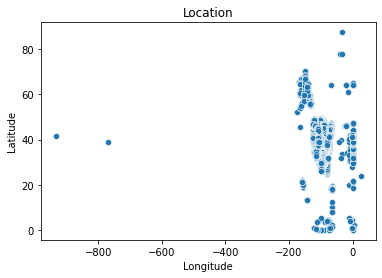

In [32]:
# plot coordinate values to visualize map
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [33]:
#Select Latitude and longitude values to drop outside the US vicinity 
to_drop = merged_df.loc[(merged_df['longitude'] < -167) | (merged_df['longitude'] > -50) | (merged_df['latitude'] < 20)]
to_drop.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,avg_truck_traffic,freeze_thaw_cycle,snowfall_days,...,latitude,longitude,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition
0,'1 - Alabama',080103000001007,'N','N','N','N','3',NaN,NaN,NaN,...,0.00000,0.000000,0,20,0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'N','N','N','N','3',NaN,NaN,NaN,...,0.00000,0.000000,0,45,0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'N','N','N','N','3',14,6,8.0,...,31.10981,-9.024917,0,0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'1','0','0','0','3',20,NaN,NaN,...,33.52243,-33.522430,0,0,75.1,24.9,27.6,'9','9','9'
188,'1 - Alabama',DAPTRARUC025465,'2','0','0','0','3',1,16,1.0,...,31.37200,0.000000,0,0,34.1,14.4,16.4,'7','7','7'


In [34]:
merged_df.drop(to_drop.index, axis=0, inplace=True)

Text(0, 0.5, 'Latitude')

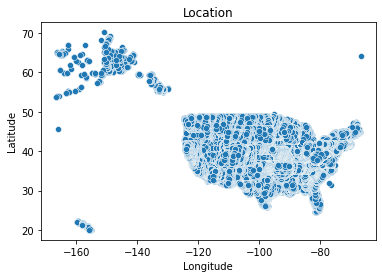

In [35]:
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [36]:
to_drop = merged_df.loc[(merged_df['latitude'] < 55) & (merged_df['longitude'] < -163) |
                        (merged_df['latitude'] > 50) & (merged_df['longitude'] > -80) ]

In [37]:
merged_df.drop(to_drop.index, axis=0, inplace=True)

Text(0, 0.5, 'Latitude')

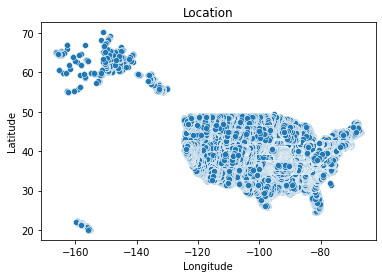

In [38]:
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Removing unwanted characters from State

In [39]:
# iterate over columns to remove qoutes
merged_df = merged_df.applymap(lambda x: x.replace("'", '') if (isinstance(x, str)) else x)

In [40]:
#remove quotes from state
merged_df['state'] = merged_df['state'].map(lambda x: x.lstrip(''))

#remove numbers and characters from 'state'
merged_df['state'] = merged_df['state'].replace('[0123456789-]', '', regex=True)
merged_df['county'] = merged_df['county'].replace('[0123456789-]', '', regex=True)

In [41]:
merged_df.state

4               Alabama
5               Alabama
6               Alabama
7               Alabama
8               Alabama
              ...      
618451      Connecticut
618452      Connecticut
618453      Connecticut
618454      Connecticut
618455      Connecticut
Name: state, Length: 609874, dtype: object

In [42]:
merged_df.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,avg_truck_traffic,freeze_thaw_cycle,snowfall_days,...,latitude,longitude,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition
4,Alabama,021480,1,0,0,0,3,35,14,0.0,...,31.12305,-85.05527,0,23,274.9,38.1,41.0,7,7,7
5,Alabama,009763,N,6,0,0,3,7,14,0.0,...,31.05112,-85.09267,0,45,12.1,0.0,0.0,N,N,N
6,Alabama,003324,N,N,N,N,3,7,14,0.0,...,31.17840,-85.11512,2009,0,7.9,0.0,0.0,N,N,N
7,Alabama,006369,1,0,0,0,3,7,14,0.0,...,31.18900,-85.11860,0,0,60,23.6,27.6,7,7,6
8,Alabama,015078,2,0,0,0,3,0,14,0.0,...,31.10713,-85.17017,0,0,15.1,23.6,24.9,5,6,5


### Removing irrelevant characters in Bridge condition

In [43]:
merged_df.bridge_condition.value_counts(normalize=True)

Fair                  0.463043
Good                  0.439246
Poor                  0.070374
AMTRAK                0.000103
                      0.000097
                        ...   
 Johnson Mi           0.000002
T-498                 0.000002
Barkley Road          0.000002
NEILSON AVE           0.000002
ELLIS CREEK ROAD      0.000002
Name: bridge_condition, Length: 11025, dtype: float64

In [44]:
# Get a list of the top 3 bridge_conditions
top3 = merged_df['bridge_condition'].value_counts()[:3].index

# At locations where the neighborhood is NOT in the top 3, 
# replace the brdige_condition with 'NA'
merged_df.loc[np.logical_not(merged_df['bridge_condition'].isin(top3)), 'bridge_condition'] = np.nan

In [45]:
merged_df.bridge_condition.value_counts()

Fair    282396
Good    267883
Poor     42919
Name: bridge_condition, dtype: int64

In [46]:
merged_df.bridge_condition.value_counts(normalize=True)

Fair    0.476057
Good    0.451591
Poor    0.072352
Name: bridge_condition, dtype: float64

### Dealing with missing values

We will be dropping the rows with missing locational data since they would be irrelevant if we can't locate them on the map.

In [47]:
merged_df.isna().sum()

state                              0
str_id                             0
deck_type                          0
wearing_type                       0
membrane_type                      0
deck_protection                    0
toll                               0
avg_truck_traffic              31782
freeze_thaw_cycle                 41
snowfall_days                    283
inventory_class_route              0
lanes_on_str                       0
lanes_under_str                    0
level_service_code                 0
yr_avg_traffic                    18
inventory_route_code               0
truck_network_code                 0
min_vertical_underclearance        0
min_lateral_underclearanceR        0
min_lateral_underclearanceL        0
county                             0
avg_daily_trfc                    16
design_material                    0
construction_design_value          0
num_spans                          0
structure_length                   0
bridge_condition               16676
b

In [48]:
# Drop rows which contain any NaN value in the selected columns
mod_df = merged_df.dropna( how='any',
                    subset=['latitude', 'longitude', 'bridge_condition'])

In [49]:
# fill 'avg_daily_trfc' missing values using random choice

s = mod_df.avg_daily_trfc.value_counts(normalize=True)
mod_df['avg_daily_trfic'] =mod_df['avg_daily_trfc']
mod_df.loc[mod_df.avg_daily_trfc.isna(),
           'avg_daily_trfic'] = np.random.choice(s.index, p=s.values, 
                                                 size=mod_df.avg_daily_trfc.isna().sum())

In [50]:
#drop the original 'avg_daily_trfc' column
mod_df.drop('avg_daily_trfc', axis=1, inplace=True)

In [51]:
# Replace missing values in yr_reconst by 0 assuming they have never been reconstructed
# Replace 'freeze_thaw_cycle', 'snowfall_days' missing values by 0 assuming they have no snowfall
cols = ['yr_reconst', 'freeze_thaw_cycle', 'snowfall_days']
for col in cols:
    mod_df[col].fillna(value=0, inplace=True)


In [52]:
mod_df.isna().sum()

state                              0
str_id                             0
deck_type                          0
wearing_type                       0
membrane_type                      0
deck_protection                    0
toll                               0
avg_truck_traffic              31144
freeze_thaw_cycle                  0
snowfall_days                      0
inventory_class_route              0
lanes_on_str                       0
lanes_under_str                    0
level_service_code                 0
yr_avg_traffic                    18
inventory_route_code               0
truck_network_code                 0
min_vertical_underclearance        0
min_lateral_underclearanceR        0
min_lateral_underclearanceL        0
county                             0
design_material                    0
construction_design_value          0
num_spans                          0
structure_length                   0
bridge_condition                   0
bridge_age                         0
l

Average truck traffic values missing acount for less than 6% of the data, but instead of lossing this data we will replace it by random choice.

In [53]:
# fill 'avg_daily_trfc' missing values using random choice
s = mod_df.avg_truck_traffic.value_counts(normalize=True)
mod_df['avg_truck_trfc'] =mod_df['avg_truck_traffic']
mod_df.loc[mod_df.avg_truck_trfc.isna(),
           'avg_truck_trfc'] = np.random.choice(s.index, p=s.values, size=mod_df.avg_truck_traffic.isna().sum())

In [54]:
#drop the original 'avg_truck_trfc' column
mod_df.drop('avg_truck_traffic', axis=1, inplace=True)

Referring to the National Bridge Inventory the Deck condition ranges from 0 to 9, with 0 signifying a failed structure and 9 being excellent condition of the structure, let's replace the character "N" with NAN and treat it as a missing value. 

In [55]:
cond_cols = ['deck_condition', 'sub_st_condition', 'super_st_condition']

for col in cond_cols:
    print(mod_df[col].value_counts())
    print('=======================')
    mod_df[col] = mod_df[col].replace({'N': np.nan}, regex=True)
    print(mod_df[col].value_counts())

7    191554
N    143438
6    113856
8     61947
5     55468
4     12190
9     10897
3      2150
0       785
2       399
1        72
Name: deck_condition, dtype: int64
7    191554
6    113856
8     61947
5     55468
4     12190
9     10897
3      2150
0       785
2       399
1        72
Name: deck_condition, dtype: int64
7    177119
N    138246
6    110455
8     71885
5     60488
4     16904
9     11362
3      4118
2      1150
0       778
1       251
Name: sub_st_condition, dtype: int64
7    177119
6    110455
8     71885
5     60488
4     16904
9     11362
3      4118
2      1150
0       778
1       251
Name: sub_st_condition, dtype: int64
7    171640
N    138080
6    108215
8     86399
5     56477
4     14119
9     13530
3      2740
0       779
2       591
1       186
Name: super_st_condition, dtype: int64
7    171640
6    108215
8     86399
5     56477
4     14119
9     13530
3      2740
0       779
2       591
1       186
Name: super_st_condition, dtype: int64


In [56]:
mod_df.isna().sum()

state                               0
str_id                              0
deck_type                           0
wearing_type                        0
membrane_type                       0
deck_protection                     0
toll                                0
freeze_thaw_cycle                   0
snowfall_days                       0
inventory_class_route               0
lanes_on_str                        0
lanes_under_str                     0
level_service_code                  0
yr_avg_traffic                     18
inventory_route_code                0
truck_network_code                  0
min_vertical_underclearance         0
min_lateral_underclearanceR         0
min_lateral_underclearanceL         0
county                              0
design_material                     0
construction_design_value           0
num_spans                           0
structure_length                    0
bridge_condition                    0
bridge_age                          0
latitude    

In [57]:
#change 'str' datatype of continuous variables to numeric values
to_numeric = ['avg_daily_trfic','yr_reconst','skew', 'max_span','num_spans',
              'structure_length','avg_truck_trfc', 'bridge_age','min_vertical_underclearance',
              'lanes_under_str','freeze_thaw_cycle','min_lateral_underclearanceR']

for col in to_numeric:
      mod_df[col] = pd.to_numeric(mod_df[col], errors='coerce') 

## Visualization

Text(0, 0.5, 'Number of Bridges')

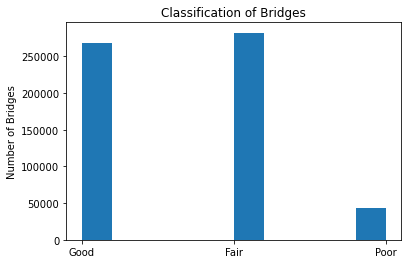

In [58]:
#plot number of wells according to functionality
plt.hist('bridge_condition', data=mod_df);
plt.title('Classification of Bridges')
plt.ylabel('Number of Bridges')

### Super structure condition

In [59]:
quantity_df = mod_df.groupby('super_st_condition')['bridge_condition'].value_counts().unstack()

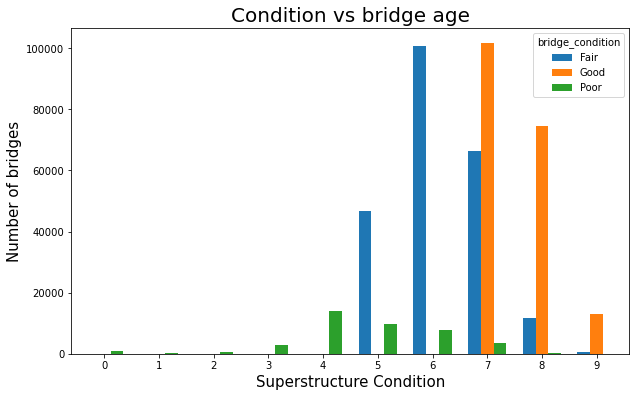

In [60]:
quantity_df.plot.bar(figsize = (10, 6), width=0.7)
plt.title('Condition vs bridge age', fontsize=20)
plt.xlabel('Superstructure Condition', fontsize=15)
plt.ylabel('Number of bridges', fontsize=15)
plt.xticks(rotation = 0);

In [61]:
# sns.pairplot(mod_df, hue='bridge_condition')

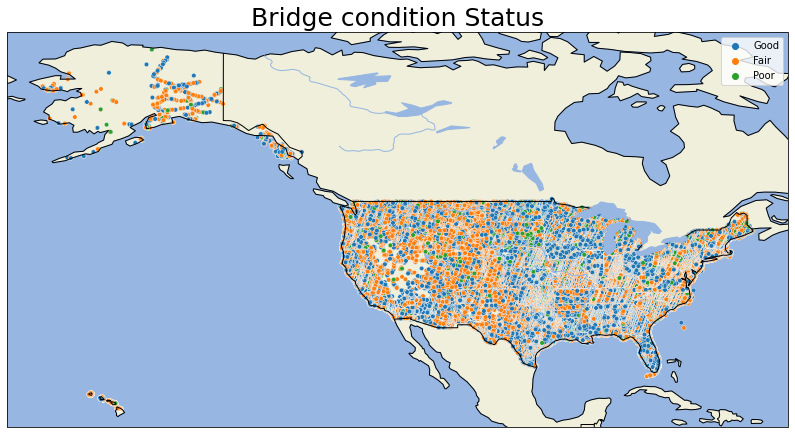

In [62]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(14,10))

# Creates the map
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle='-')
ca_map.add_feature(cfeature.LAKES)
ca_map.add_feature(cfeature.RIVERS)
# ca_map.add_feature(cfeature.STATES.with_scale('10m'))


# Plots the data onto map
sns.scatterplot(mod_df['longitude'], mod_df['latitude'], 
            s=20,
            hue=mod_df['bridge_condition'],
            transform=ccrs.PlateCarree())

# Plot labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Bridge condition Status', fontsize=25)
plt.legend()
plt.show()

In [63]:
mod_df.shape

(592756, 38)

In [64]:
mod_df1 = mod_df[:200000]
mod_df2 = mod_df[200000:400000]
mod_df3 = mod_df[400000:]

In [65]:
mod_df1.to_csv('bridge_data_cleaned1', index=False)
mod_df2.to_csv('bridge_data_cleaned2', index=False)
mod_df3.to_csv('bridge_data_cleaned3', index=False)

In the next step we will be taking a look at the modeling procedure for bridge condition classification. According to the NBI reports the three features (Super-structure, Sub-structure and Deck Condition) are dependent variables. Therefore, we will be dropping them since our target variable is 'bridge_condition.

In [66]:
mod_df.drop(columns=['super_st_condition', 'sub_st_condition', 'deck_condition'], axis=1, inplace=True)

In [67]:
#drop the nan values in 'bridge_condition'
mod_df.dropna(inplace=True)

# Creating Dummies

In [68]:
mod_df.columns

Index(['state', 'str_id', 'deck_type', 'wearing_type', 'membrane_type',
       'deck_protection', 'toll', 'freeze_thaw_cycle', 'snowfall_days',
       'inventory_class_route', 'lanes_on_str', 'lanes_under_str',
       'level_service_code', 'yr_avg_traffic', 'inventory_route_code',
       'truck_network_code', 'min_vertical_underclearance',
       'min_lateral_underclearanceR', 'min_lateral_underclearanceL', 'county',
       'design_material', 'construction_design_value', 'num_spans',
       'structure_length', 'bridge_condition', 'bridge_age', 'latitude',
       'longitude', 'yr_reconst', 'skew', 'max_span', 'bridge_width',
       'deck_width', 'avg_daily_trfic', 'avg_truck_trfc'],
      dtype='object')

In [69]:
#separate the features into target, categorical and continuous variables
target = ['bridge_condition']

categorical = ['deck_type', 'wearing_type', 'membrane_type', 'deck_protection',
               'toll', 'design_material',  'inventory_class_route', 'level_service_code', 'inventory_route_code',
               'truck_network_code',
               'construction_design_value']

continuous = ['freeze_thaw_cycle', 'snowfall_days', 'structure_length', 'bridge_age',
              'latitude', 'longitude', 'yr_reconst', 'skew', 'yr_avg_traffic',
              'max_span', 'bridge_width', 'deck_width', 'avg_daily_trfic', 'num_spans',
              'avg_truck_trfc', 'min_vertical_underclearance','lanes_on_str', 
               'lanes_under_str',
               'min_lateral_underclearanceR', 'min_lateral_underclearanceL']

to_drop = ['state', 'str_id', 'county']

In [70]:
# print number of classes in each category
for col in categorical:
    print(col, mod_df[col].value_counts().count())

deck_type 10
wearing_type 11
membrane_type 7
deck_protection 10
toll 5
design_material 9
inventory_class_route 12
level_service_code 8
inventory_route_code 2
truck_network_code 2
construction_design_value 22


In [71]:
# select only the categorical variables
mod_df.drop(to_drop+target+continuous, axis=1).columns

Index(['deck_type', 'wearing_type', 'membrane_type', 'deck_protection', 'toll',
       'inventory_class_route', 'level_service_code', 'inventory_route_code',
       'truck_network_code', 'design_material', 'construction_design_value'],
      dtype='object')

In [72]:
# Use one-hot-encoding on categorical variables
df_dummies = pd.get_dummies(mod_df.drop(to_drop+target, axis=1))
df_dummies.head()

,freeze_thaw_cycle,snowfall_days,lanes_on_str,lanes_under_str,yr_avg_traffic,min_vertical_underclearance,min_lateral_underclearanceR,min_lateral_underclearanceL,num_spans,structure_length,...,construction_design_value_Orthotropic,construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type,construction_design_value_Segmental Box Girder,construction_design_value_Slab,construction_design_value_Stayed Girder,construction_design_value_Stringer/Multi-beam or Girder,construction_design_value_Suspension,construction_design_value_Tee Beam,construction_design_value_Truss - Deck,construction_design_value_Truss - Thru
4,14,0.0,2,0,2012.0,0.0,0.0,0.0,3,955.1,...,0,0,0,0,0,1,0,0,0,0
5,14,0.0,2,0,1990.0,0.0,0.0,0.0,3,52.5,...,0,0,0,0,0,0,0,0,0,0
6,14,0.0,2,0,2011.0,0.0,0.0,0.0,3,25.3,...,0,0,0,0,0,0,0,0,0,0
7,14,0.0,2,0,2011.0,0.0,0.0,0.0,3,399.0,...,0,0,0,0,0,0,0,1,0,0
8,14,0.0,2,0,1992.0,0.0,0.0,0.0,3,44.9,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df_dummies.shape

(592738, 118)

In [74]:
df_dummies['bridge_condition'] = mod_df['bridge_condition']

In [75]:
df_dummies.head()

,freeze_thaw_cycle,snowfall_days,lanes_on_str,lanes_under_str,yr_avg_traffic,min_vertical_underclearance,min_lateral_underclearanceR,min_lateral_underclearanceL,num_spans,structure_length,...,construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type,construction_design_value_Segmental Box Girder,construction_design_value_Slab,construction_design_value_Stayed Girder,construction_design_value_Stringer/Multi-beam or Girder,construction_design_value_Suspension,construction_design_value_Tee Beam,construction_design_value_Truss - Deck,construction_design_value_Truss - Thru,bridge_condition
4,14,0.0,2,0,2012.0,0.0,0.0,0.0,3,955.1,...,0,0,0,0,1,0,0,0,0,Good
5,14,0.0,2,0,1990.0,0.0,0.0,0.0,3,52.5,...,0,0,0,0,0,0,0,0,0,Fair
6,14,0.0,2,0,2011.0,0.0,0.0,0.0,3,25.3,...,0,0,0,0,0,0,0,0,0,Good
7,14,0.0,2,0,2011.0,0.0,0.0,0.0,3,399.0,...,0,0,0,0,0,0,1,0,0,Fair
8,14,0.0,2,0,1992.0,0.0,0.0,0.0,3,44.9,...,0,0,0,0,0,0,0,0,0,Fair


In [76]:
df_dummies.bridge_condition.value_counts(normalize=True)

Fair    0.476145
Good    0.451491
Poor    0.072364
Name: bridge_condition, dtype: float64

# Modeling

In [77]:
# assign variables for features and target 
X = df_dummies.drop('bridge_condition', axis = 1)
y = df_dummies['bridge_condition']

In [78]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=df_dummies['bridge_condition'], random_state = 42)

# KNN

In [80]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

models = []
def get_metrics(y_test, X_test, model):
    labels = y_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='macro')
    metrics['precision'] = precision_score(labels, preds, average='macro')
    metrics['recall'] = recall_score(labels, preds, average='macro')
    
    return metrics

## Baseline model

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, knn)
metrics['name'] = 'K Nearest Neighbors Baseline'
models.append(metrics)

In [83]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.72      0.80      0.76    211671
        Good       0.79      0.77      0.78    200712
        Poor       0.71      0.27      0.39     32170

    accuracy                           0.75    444553
   macro avg       0.74      0.61      0.64    444553
weighted avg       0.75      0.75      0.74    444553



In [84]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.62      0.69      0.65     70558
        Good       0.67      0.66      0.67     66904
        Poor       0.46      0.16      0.24     10723

    accuracy                           0.64    148185
   macro avg       0.58      0.50      0.52    148185
weighted avg       0.63      0.64      0.63    148185



## Confusion matrix

<Figure size 432x360 with 0 Axes>

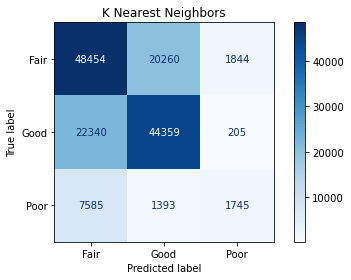

In [85]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Standardization

First scale the data. We scale the data after splitting the train and test data to avoid data leakage.

In [108]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,freeze_thaw_cycle,snowfall_days,lanes_on_str,lanes_under_str,yr_avg_traffic,min_vertical_underclearance,min_lateral_underclearanceR,min_lateral_underclearanceL,num_spans,structure_length,...,construction_design_value_Orthotropic,construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type,construction_design_value_Segmental Box Girder,construction_design_value_Slab,construction_design_value_Stayed Girder,construction_design_value_Stringer/Multi-beam or Girder,construction_design_value_Suspension,construction_design_value_Tee Beam,construction_design_value_Truss - Deck,construction_design_value_Truss - Thru
0,-1.080208,-0.882637,-0.239328,-0.317957,0.082843,-0.366578,2.334734,-0.201127,0.291625,-0.227231,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,-0.802160,-0.010919,-0.249486,-0.023144,-0.11253
1,-0.874480,-1.021765,-1.061838,-0.317957,-0.072013,-0.366578,-0.489493,-0.201127,-0.385266,-0.260052,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,1.246633,-0.010919,-0.249486,-0.023144,-0.11253
2,1.091363,1.204270,0.583182,3.261670,0.103042,1.552256,-0.192653,0.533380,0.291625,0.477603,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,1.246633,-0.010919,-0.249486,-0.023144,-0.11253
3,1.982850,0.842539,-0.239328,-0.317957,0.103042,-0.366578,-0.489493,-0.201127,-0.159636,-0.195108,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,1.246633,-0.010919,-0.249486,-0.023144,-0.11253
4,-0.714469,-0.799161,-0.239328,-0.317957,0.096309,-0.366578,-0.489493,-0.201127,0.742886,0.072114,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,-0.802160,-0.010919,4.008245,-0.023144,-0.11253


Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy.

In [87]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier
knn.fit(scaled_data_train, y_train);


# Predict on the test set

metrics = get_metrics(y_test, scaled_data_test, knn)
metrics['name'] = 'K Nearest Neighbors scaled'
models.append(metrics)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

## Grid search CV

In [86]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'n_neighbors': [1, 5, 9], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [30, 40], # default 30
    'p': [1, 2] # default 2
}



grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [30, 40], 'n_neighbors': [1, 5, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [91]:
grid_search.best_params_

{'leaf_size': 30, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [92]:
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=30, p=1)
knn_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, knn_tuned)
metrics['name'] = 'K Nearest Neighbors tuned'
models.append(metrics)

## Confusion Matrix

<Figure size 432x360 with 0 Axes>

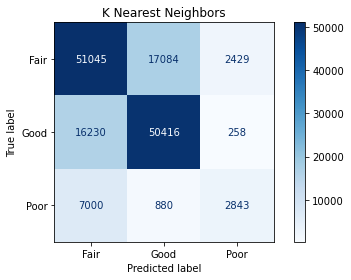

In [93]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn_tuned, scaled_data_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

In [ ]:
print(classification_report(y_train, knn_tuned.predict(scaled_data_train)))

In [ ]:
print(classification_report(y_test, knn_tuned.predict(scaled_data_test)))

## Smote

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

Fair    282229
Good    267616
Poor     42893
Name: bridge_condition, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

Poor    211671
Good    211671
Fair    211671
Name: bridge_condition, dtype: int64


In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors=9, weights='distance', 
                                 leaf_size=30, p=1)
knn_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, knn_smote)
metrics['name'] = 'K Nearest Neighbors smote'
models.append(metrics)

In [ ]:
print(classification_report(y_train_resampled, knn_smote.predict(X_train_resampled)))

In [ ]:
print(classification_report(y_test, knn_smote.predict(X_test)))

## Confusion matrix

In [ ]:
plot_confusion_matrix(knn_smote, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)
                                      
                     
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()

# Random Forest

## Baseline model

In [138]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, forest)
metrics['name'] = 'Random Forest Baseline'
models.append(metrics)

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,forest.predict(X_test))

array([[56105, 13203,  1250],
       [14087, 52757,    60],
       [ 7805,   467,  2451]], dtype=int64)

In [139]:
print(classification_report(y_train, forest.predict(X_train)))

              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00    211671
        Good       1.00      1.00      1.00    200712
        Poor       1.00      1.00      1.00     32170

    accuracy                           1.00    444553
   macro avg       1.00      1.00      1.00    444553
weighted avg       1.00      1.00      1.00    444553



In [140]:
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.72      0.80      0.76     70558
        Good       0.79      0.79      0.79     66904
        Poor       0.65      0.23      0.34     10723

    accuracy                           0.75    148185
   macro avg       0.72      0.60      0.63    148185
weighted avg       0.75      0.75      0.74    148185



## Confusion Matrix

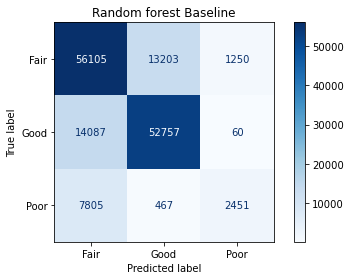

In [141]:
plot_confusion_matrix(forest, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)

plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

## Grid search

In [87]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': ['auto',50, 60], # default 'auto': auto=sqrt(# of features)=11
#     'min_samples_split' : 70,
#     'min_samples_leaf'  : 35
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [88]:
grid_search.best_params_

{'max_depth': 40, 'max_features': 60, 'n_estimators': 200}

In [142]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=40,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, forest_tuned)
metrics['name'] = 'Random Forest tuned'
models.append(metrics)

In [143]:
print(classification_report(y_train, forest_tuned.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.73      0.82      0.77    211671
        Good       0.81      0.80      0.81    200712
        Poor       0.77      0.19      0.30     32170

    accuracy                           0.77    444553
   macro avg       0.77      0.60      0.63    444553
weighted avg       0.77      0.77      0.75    444553



In [144]:
print(classification_report(y_test, forest_tuned.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.70      0.79      0.74     70558
        Good       0.78      0.77      0.77     66904
        Poor       0.69      0.16      0.26     10723

    accuracy                           0.74    148185
   macro avg       0.72      0.57      0.59    148185
weighted avg       0.74      0.74      0.72    148185



In [ ]:
param_grid = {
    'n_estimators': [150, 200], # default 100
    'max_depth': [35, 40, 50], # default None
    'max_features': [55, 60, 65],
#     'min_samples_split' : 70,
#     'min_samples_leaf'  : 35 
# we assume 5 would be the min sample leaf and avoid further search    
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

In [88]:
grid_search.best_params_

{'max_depth': 40, 'max_features': 60, 'n_estimators': 200}

In [142]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=40,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, forest_tuned)
metrics['name'] = 'Random Forest tuned'
models.append(metrics)

In [143]:
print(classification_report(y_train, forest_tuned.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.73      0.82      0.77    211671
        Good       0.81      0.80      0.81    200712
        Poor       0.77      0.19      0.30     32170

    accuracy                           0.77    444553
   macro avg       0.77      0.60      0.63    444553
weighted avg       0.77      0.77      0.75    444553



In [144]:
print(classification_report(y_test, forest_tuned.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.70      0.79      0.74     70558
        Good       0.78      0.77      0.77     66904
        Poor       0.69      0.16      0.26     10723

    accuracy                           0.74    148185
   macro avg       0.72      0.57      0.59    148185
weighted avg       0.74      0.74      0.72    148185



## Smote

In [127]:
forest_smote = RandomForestClassifier(n_estimators=200, max_depth=40,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, forest_smote)
metrics['name'] = 'Random Forest smote'
models.append(metrics)

KeyboardInterrupt: 

In [ ]:
print(classification_report(y_train, forest_smote.predict(X_train)))

In [ ]:
print(classification_report(y_test, forest_smote.predict(X_test)))

In [ ]:
plot_confusion_matrix(forest_smote, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)

plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

## Feature importance

Text(0, 0.5, 'Features')

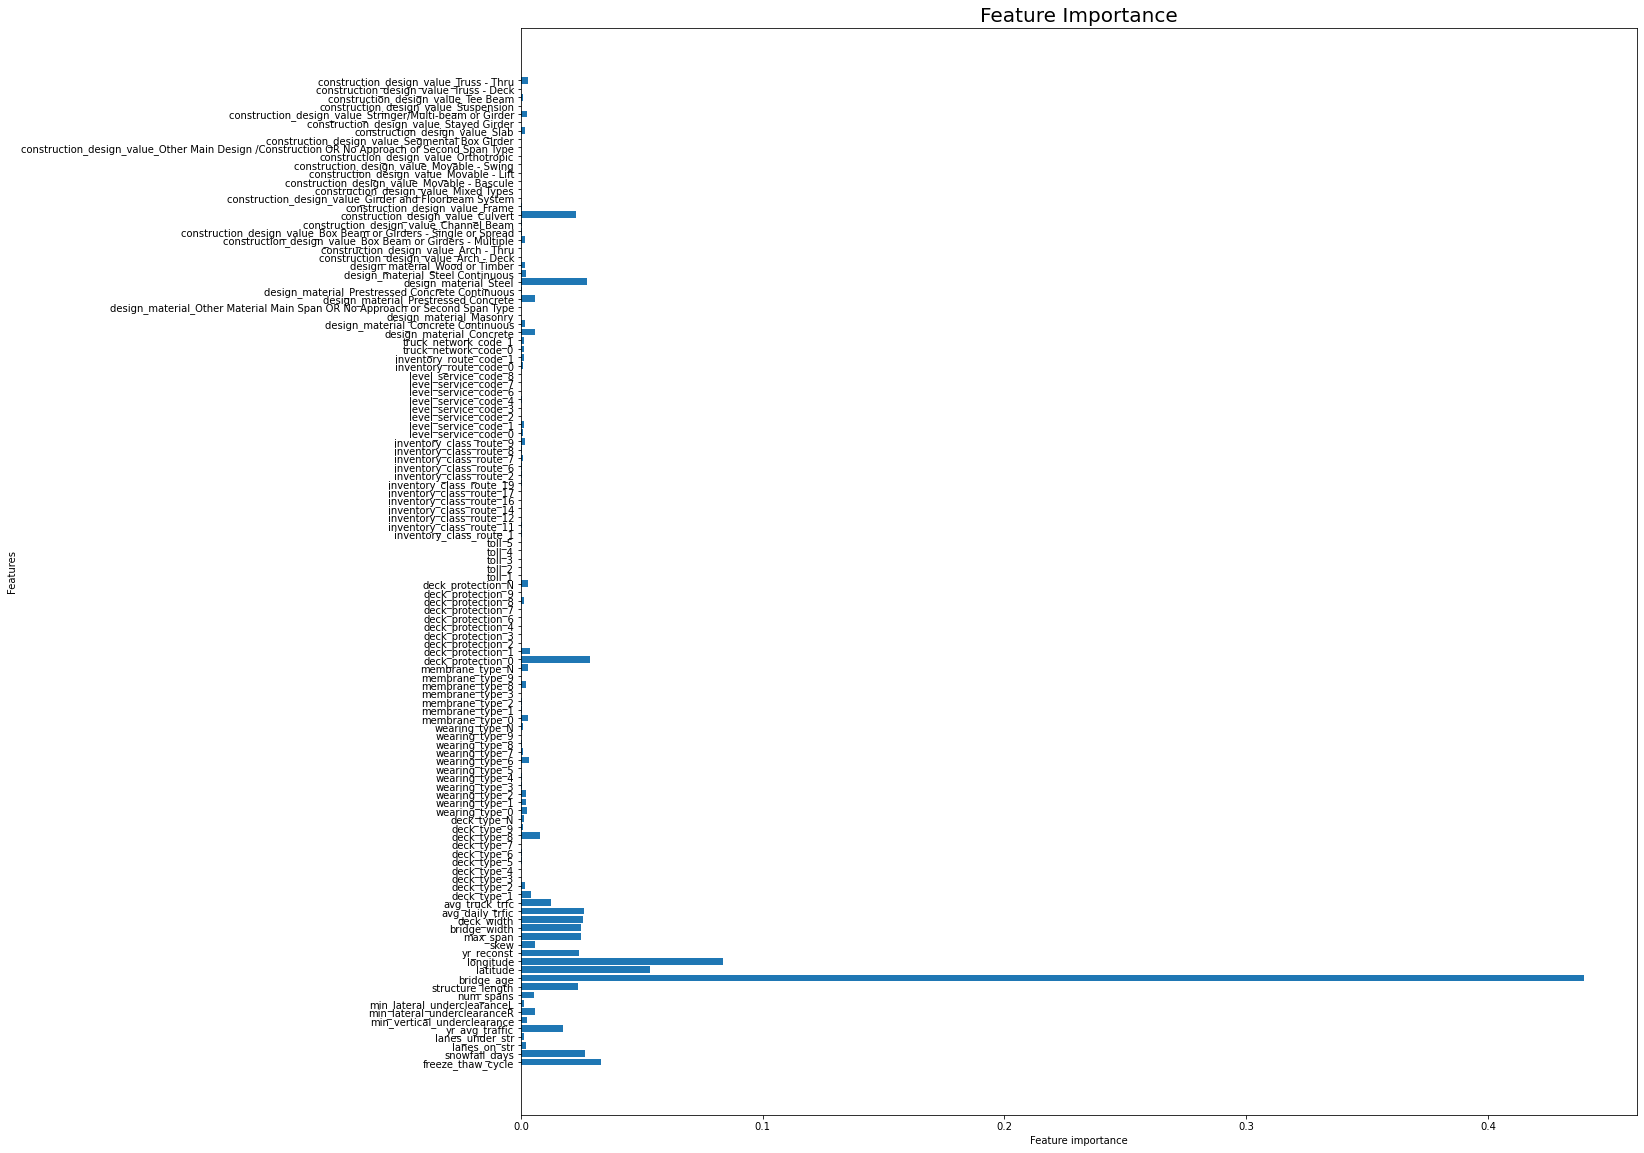

In [102]:
# Plot the feature importance of each feature
features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(features), forest_tuned.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns.values)
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Feature importance')
plt.ylabel('Features')

# XGBoost

## Baseline model

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate XGBClassifier and fit classifier
xgb = XGBClassifier(random_state=12)
xgb.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, xgb)
# metrics['name'] = 'XG Boost Baseline'
# models.append(metrics)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:17:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [104]:
print(classification_report(y_train, xgb.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.71      0.80      0.75    211671
        Good       0.79      0.78      0.78    200712
        Poor       0.69      0.22      0.33     32170

    accuracy                           0.75    444553
   macro avg       0.73      0.60      0.62    444553
weighted avg       0.75      0.75      0.74    444553



In [105]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.70      0.78      0.74     70558
        Good       0.78      0.76      0.77     66904
        Poor       0.64      0.20      0.31     10723

    accuracy                           0.73    148185
   macro avg       0.70      0.58      0.60    148185
weighted avg       0.73      0.73      0.72    148185



## Confusion matrix

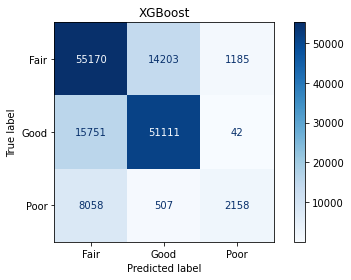

In [106]:
plot_confusion_matrix(xgb, X_test, y_test, 
                     values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('XGBoost')
plt.tight_layout()

plt.show()

## Standardization

In [109]:
# Fit the classifier
xgb.fit(scaled_data_train, y_train);

# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, xgb)
metrics['name'] = 'XGBoost_scaled'
models.append(metrics)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Grid search

In [110]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 150, 200],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:23:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[00:51:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:00:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:04:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[04:12:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:17:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:22:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:27:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[07:56:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:59:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:08:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[10:39:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[14:42:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=N

In [116]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.5}

In [135]:
xgb_tuned

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=0.7,
              tree_method=None, use_label_encoder=True,
              validate_parameters=None, verbosity=None)

In [136]:
# Instantiate XGBClassifier and fit classifier

xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
                          subsample=0.5)
eval_set = [(X_test, y_test)]
xgb_tuned.fit(scaled_data_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost_tuned1'
models.append(metrics)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117'] ['freeze_thaw_cycle', 'snowfall_days', 'lanes_on_str', 'lanes_under_str', 'yr_avg_traffic', 'min_vertical_underclearance', 'min_lateral_underclearanceR', 'min_lateral_underclearanceL', 'num_spans', 'structure_length', 'bridge_age', 'latitude', 'longitude', 'yr_reconst', 'skew', 'max_span', 'bridge_width', 'deck_width', 'avg_daily_trfic', 'avg_truck_trfc', 'deck_type_1', 'deck_type_2', 'deck_type_3', 'deck_type_4', 'deck_type_5', 'deck_type_6', 'deck_type_7', 'deck_type_8', 'deck_type_9', 'deck_type_N', 'wearing_type_0', 'wearing_type_1', 'wearing_type_2', 'wearing_type_3', 'wearing_type_4', 'wearing_type_5', 'wearing_type_6', 'wearing_type_7', 'wearing_type_8', 'wearing_type_9', 'wearing_type_N', 'membrane_type_0', 'membrane_type_1', 'membrane_type_2', 'membrane_type_3', 'membrane_type_8', 'membrane_type_9', 'membrane_type_N', 'deck_protection_0', 'deck_protection_1', 'deck_protection_2', 'deck_protection_3', 'deck_protection_4', 'deck_protection_6', 'deck_protection_7', 'deck_protection_8', 'deck_protection_9', 'deck_protection_N', 'toll_1', 'toll_2', 'toll_3', 'toll_4', 'toll_5', 'inventory_class_route_1', 'inventory_class_route_11', 'inventory_class_route_12', 'inventory_class_route_14', 'inventory_class_route_16', 'inventory_class_route_17', 'inventory_class_route_19', 'inventory_class_route_2', 'inventory_class_route_6', 'inventory_class_route_7', 'inventory_class_route_8', 'inventory_class_route_9', 'level_service_code_0', 'level_service_code_1', 'level_service_code_2', 'level_service_code_3', 'level_service_code_4', 'level_service_code_6', 'level_service_code_7', 'level_service_code_8', 'inventory_route_code_0', 'inventory_route_code_1', 'truck_network_code_0', 'truck_network_code_1', 'design_material_Concrete', 'design_material_Concrete Continuous', 'design_material_Masonry', 'design_material_Other Material Main Span OR No Approach or Second Span Type', 'design_material_Prestressed Concrete', 'design_material_Prestressed Concrete Continuous', 'design_material_Steel', 'design_material_Steel Continuous', 'design_material_Wood or Timber', 'construction_design_value_Arch - Deck', 'construction_design_value_Arch - Thru', 'construction_design_value_Box Beam or Girders - Multiple', 'construction_design_value_Box Beam or Girders - Single or Spread', 'construction_design_value_Channel Beam', 'construction_design_value_Culvert', 'construction_design_value_Frame', 'construction_design_value_Girder and Floorbeam System', 'construction_design_value_Mixed Types', 'construction_design_value_Movable - Bascule', 'construction_design_value_Movable - Lift', 'construction_design_value_Movable - Swing', 'construction_design_value_Orthotropic', 'construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type', 'construction_design_value_Segmental Box Girder', 'construction_design_value_Slab', 'construction_design_value_Stayed Girder', 'construction_design_value_Stringer/Multi-beam or Girder', 'construction_design_value_Suspension', 'construction_design_value_Tee Beam', 'construction_design_value_Truss - Deck', 'construction_design_value_Truss - Thru']
expected f60, f6, f64, f72, f9, f97, f37, f39, f83, f95, f101, f13, f53, f8, f81, f32, f63, f100, f88, f14, f57, f79, f116, f107, f49, f18, f69, f74, f45, f15, f52, f19, f28, f62, f103, f77, f92, f66, f109, f5, f34, f85, f104, f42, f75, f2, f4, f31, f78, f108, f20, f70, f26, f25, f7, f10, f54, f17, f102, f30, f114, f89, f84, f21, f36, f43, f96, f24, f46, f68, f113, f67, f55, f115, f48, f51, f40, f80, f110, f29, f56, f106, f61, f94, f22, f35, f87, f105, f1, f12, f58, f38, f41, f90, f47, f59, f93, f73, f23, f117, f86, f91, f0, f76, f99, f11, f27, f65, f3, f82, f112, f16, f71, f111, f33, f98, f50, f44 in input data
training data did not have the following fields: wearing_type_5, level_service_code_8, inventory_class_route_14, toll_3, construction_design_value_Mixed Types, membrane_type_1, inventory_route_code_1, deck_protection_N, membrane_type_N, membrane_type_9, lanes_under_str, construction_design_value_Frame, level_service_code_4, deck_protection_3, bridge_age, deck_type_9, toll_2, design_material_Prestressed Concrete Continuous, design_material_Wood or Timber, min_lateral_underclearanceL, yr_reconst, wearing_type_4, level_service_code_3, design_material_Concrete Continuous, truck_network_code_0, structure_length, deck_type_3, toll_1, snowfall_days, max_span, deck_type_8, inventory_class_route_17, design_material_Concrete, deck_protection_7, deck_type_4, construction_design_value_Arch - Thru, construction_design_value_Channel Beam, wearing_type_9, deck_protection_0, level_service_code_7, deck_width, deck_type_7, construction_design_value_Arch - Deck, construction_design_value_Culvert, level_service_code_2, wearing_type_8, inventory_class_route_6, construction_design_value_Movable - Lift, inventory_route_code_0, deck_protection_2, construction_design_value_Box Beam or Girders - Multiple, inventory_class_route_11, deck_type_1, deck_type_5, construction_design_value_Truss - Thru, min_vertical_underclearance, deck_type_6, wearing_type_0, lanes_on_str, membrane_type_0, design_material_Other Material Main Span OR No Approach or Second Span Type, construction_design_value_Girder and Floorbeam System, design_material_Masonry, design_material_Prestressed Concrete, design_material_Steel Continuous, wearing_type_6, membrane_type_2, inventory_class_route_9, deck_type_2, avg_daily_trfic, membrane_type_3, wearing_type_2, inventory_class_route_2, level_service_code_0, bridge_width, deck_protection_6, inventory_class_route_16, construction_design_value_Slab, deck_protection_8, construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type, construction_design_value_Stayed Girder, toll_4, wearing_type_N, construction_design_value_Movable - Swing, construction_design_value_Segmental Box Girder, toll_5, inventory_class_route_8, deck_type_N, deck_protection_1, longitude, inventory_class_route_19, avg_truck_trfc, wearing_type_3, latitude, num_spans, inventory_class_route_7, construction_design_value_Movable - Bascule, construction_design_value_Orthotropic, construction_design_value_Suspension, design_material_Steel, yr_avg_traffic, inventory_class_route_12, min_lateral_underclearanceR, deck_protection_9, construction_design_value_Box Beam or Girders - Single or Spread, membrane_type_8, wearing_type_7, skew, level_service_code_6, freeze_thaw_cycle, construction_design_value_Stringer/Multi-beam or Girder, inventory_class_route_1, construction_design_value_Tee Beam, deck_protection_4, construction_design_value_Truss - Deck, truck_network_code_1, level_service_code_1, wearing_type_1

In [113]:
print(classification_report(y_train, xgb_tuned.predict(scaled_data_train)))

              precision    recall  f1-score   support

        Fair       0.78      0.85      0.82    211671
        Good       0.85      0.84      0.85    200712
        Poor       0.85      0.39      0.53     32170

    accuracy                           0.81    444553
   macro avg       0.83      0.69      0.73    444553
weighted avg       0.82      0.81      0.81    444553



In [117]:
print(classification_report(y_test, xgb_tuned.predict(scaled_data_test)))

              precision    recall  f1-score   support

        Fair       0.72      0.79      0.75     70558
        Good       0.79      0.78      0.79     66904
        Poor       0.66      0.25      0.36     10723

    accuracy                           0.75    148185
   macro avg       0.72      0.61      0.63    148185
weighted avg       0.75      0.75      0.74    148185



## Confusion matrix

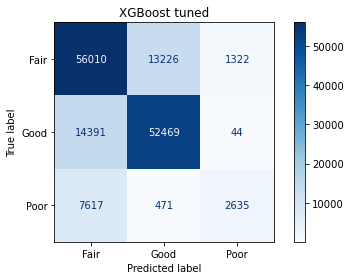

In [118]:
plot_confusion_matrix(xgb_tuned, scaled_data_test, y_test, values_format='d',
                      cmap=plt.cm.Blues)
plt.title('XGBoost tuned')
plt.tight_layout()

plt.show()

## Smote

In [122]:
# Instantiate XGBClassifier and fit classifier
xgb_smote = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
                          subsample=0.5)
xgb_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, xgb_smote)
metrics['name'] = 'XGBoost_smote'
models.append(metrics)

[20:54:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ValueError: feature_names mismatch: ['freeze_thaw_cycle', 'snowfall_days', 'lanes_on_str', 'lanes_under_str', 'yr_avg_traffic', 'min_vertical_underclearance', 'min_lateral_underclearanceR', 'min_lateral_underclearanceL', 'num_spans', 'structure_length', 'bridge_age', 'latitude', 'longitude', 'yr_reconst', 'skew', 'max_span', 'bridge_width', 'deck_width', 'avg_daily_trfic', 'avg_truck_trfc', 'deck_type_1', 'deck_type_2', 'deck_type_3', 'deck_type_4', 'deck_type_5', 'deck_type_6', 'deck_type_7', 'deck_type_8', 'deck_type_9', 'deck_type_N', 'wearing_type_0', 'wearing_type_1', 'wearing_type_2', 'wearing_type_3', 'wearing_type_4', 'wearing_type_5', 'wearing_type_6', 'wearing_type_7', 'wearing_type_8', 'wearing_type_9', 'wearing_type_N', 'membrane_type_0', 'membrane_type_1', 'membrane_type_2', 'membrane_type_3', 'membrane_type_8', 'membrane_type_9', 'membrane_type_N', 'deck_protection_0', 'deck_protection_1', 'deck_protection_2', 'deck_protection_3', 'deck_protection_4', 'deck_protection_6', 'deck_protection_7', 'deck_protection_8', 'deck_protection_9', 'deck_protection_N', 'toll_1', 'toll_2', 'toll_3', 'toll_4', 'toll_5', 'inventory_class_route_1', 'inventory_class_route_11', 'inventory_class_route_12', 'inventory_class_route_14', 'inventory_class_route_16', 'inventory_class_route_17', 'inventory_class_route_19', 'inventory_class_route_2', 'inventory_class_route_6', 'inventory_class_route_7', 'inventory_class_route_8', 'inventory_class_route_9', 'level_service_code_0', 'level_service_code_1', 'level_service_code_2', 'level_service_code_3', 'level_service_code_4', 'level_service_code_6', 'level_service_code_7', 'level_service_code_8', 'inventory_route_code_0', 'inventory_route_code_1', 'truck_network_code_0', 'truck_network_code_1', 'design_material_Concrete', 'design_material_Concrete Continuous', 'design_material_Masonry', 'design_material_Other Material Main Span OR No Approach or Second Span Type', 'design_material_Prestressed Concrete', 'design_material_Prestressed Concrete Continuous', 'design_material_Steel', 'design_material_Steel Continuous', 'design_material_Wood or Timber', 'construction_design_value_Arch - Deck', 'construction_design_value_Arch - Thru', 'construction_design_value_Box Beam or Girders - Multiple', 'construction_design_value_Box Beam or Girders - Single or Spread', 'construction_design_value_Channel Beam', 'construction_design_value_Culvert', 'construction_design_value_Frame', 'construction_design_value_Girder and Floorbeam System', 'construction_design_value_Mixed Types', 'construction_design_value_Movable - Bascule', 'construction_design_value_Movable - Lift', 'construction_design_value_Movable - Swing', 'construction_design_value_Orthotropic', 'construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type', 'construction_design_value_Segmental Box Girder', 'construction_design_value_Slab', 'construction_design_value_Stayed Girder', 'construction_design_value_Stringer/Multi-beam or Girder', 'construction_design_value_Suspension', 'construction_design_value_Tee Beam', 'construction_design_value_Truss - Deck', 'construction_design_value_Truss - Thru'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117']
expected wearing_type_5, level_service_code_8, inventory_class_route_14, toll_3, construction_design_value_Mixed Types, membrane_type_1, inventory_route_code_1, deck_protection_N, membrane_type_N, membrane_type_9, lanes_under_str, construction_design_value_Frame, level_service_code_4, deck_protection_3, bridge_age, deck_type_9, toll_2, design_material_Prestressed Concrete Continuous, design_material_Wood or Timber, min_lateral_underclearanceL, yr_reconst, wearing_type_4, level_service_code_3, design_material_Concrete Continuous, truck_network_code_0, structure_length, deck_type_3, toll_1, snowfall_days, max_span, deck_type_8, inventory_class_route_17, design_material_Concrete, deck_protection_7, deck_type_4, construction_design_value_Arch - Thru, construction_design_value_Channel Beam, wearing_type_9, deck_protection_0, level_service_code_7, deck_width, deck_type_7, construction_design_value_Arch - Deck, construction_design_value_Culvert, level_service_code_2, wearing_type_8, inventory_class_route_6, construction_design_value_Movable - Lift, inventory_route_code_0, deck_protection_2, construction_design_value_Box Beam or Girders - Multiple, inventory_class_route_11, deck_type_1, deck_type_5, construction_design_value_Truss - Thru, min_vertical_underclearance, deck_type_6, wearing_type_0, lanes_on_str, membrane_type_0, design_material_Other Material Main Span OR No Approach or Second Span Type, construction_design_value_Girder and Floorbeam System, design_material_Masonry, design_material_Prestressed Concrete, design_material_Steel Continuous, wearing_type_6, membrane_type_2, inventory_class_route_9, deck_type_2, avg_daily_trfic, membrane_type_3, wearing_type_2, inventory_class_route_2, level_service_code_0, bridge_width, deck_protection_6, inventory_class_route_16, construction_design_value_Slab, deck_protection_8, construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type, construction_design_value_Stayed Girder, toll_4, wearing_type_N, construction_design_value_Movable - Swing, construction_design_value_Segmental Box Girder, toll_5, inventory_class_route_8, deck_type_N, deck_protection_1, longitude, inventory_class_route_19, avg_truck_trfc, wearing_type_3, latitude, num_spans, inventory_class_route_7, construction_design_value_Movable - Bascule, construction_design_value_Orthotropic, construction_design_value_Suspension, design_material_Steel, yr_avg_traffic, inventory_class_route_12, min_lateral_underclearanceR, deck_protection_9, construction_design_value_Box Beam or Girders - Single or Spread, membrane_type_8, wearing_type_7, skew, level_service_code_6, freeze_thaw_cycle, construction_design_value_Stringer/Multi-beam or Girder, inventory_class_route_1, construction_design_value_Tee Beam, deck_protection_4, construction_design_value_Truss - Deck, truck_network_code_1, level_service_code_1, wearing_type_1 in input data
training data did not have the following fields: f60, f6, f64, f72, f9, f97, f37, f39, f83, f95, f101, f13, f53, f8, f81, f32, f63, f100, f88, f14, f57, f79, f116, f107, f49, f18, f69, f74, f45, f15, f52, f19, f28, f62, f103, f77, f92, f66, f109, f5, f34, f85, f104, f42, f75, f2, f4, f31, f78, f108, f20, f70, f26, f25, f7, f10, f54, f17, f102, f30, f114, f89, f84, f21, f36, f43, f96, f24, f46, f68, f113, f67, f55, f115, f48, f51, f40, f80, f110, f29, f56, f106, f61, f94, f22, f35, f87, f105, f1, f12, f58, f38, f41, f90, f47, f59, f93, f73, f23, f117, f86, f91, f0, f76, f99, f11, f27, f65, f3, f82, f112, f16, f71, f111, f33, f98, f50, f44

In [ ]:
print(classification_report(y_test, xgb_smote.predict(scaled_data_test)))

## Confusion matrix

In [ ]:
plot_confusion_matrix(xgb_smote, scaled_data_test, y_test, values_format='d',
                      cmap=plt.cm.Blues)
plt.title('XGBoost smote')
plt.tight_layout()

plt.show()

# Neural Network

In [ ]:
# Multiclass Classification with the Iris Flowers Dataset
# Import libraries
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility



seed = 7
numpy.random.seed(seed)

# load dataset

# dataset = df_dummies.values
# X = dataset[:,0:4].astype('float ')
# Y = dataset[:,4]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i . e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


#init = 'normal'

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=65, activation= 'relu'))
    model.add(Dense(3, activation= 'sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_score, precision, recall])
    return model

estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=500, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
# print (" F1-score : %.2f %% (%.2f %%) " % (results.mean()*100, results.std()*100))

#Confusion matrix